## Selecting playlists using top 20 keywrods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import seaborn as sn

sn.set(font_scale=2)  # for label size
pd.options.display.max_rows = 20
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [2]:
songdf = pd.read_csv("/home/karim/Documents/workspace/output/playlists_songs.tsv", 
                     delimiter = "\t", quoting=csv.QUOTE_NONE, error_bad_lines=False)
playlistsdf = pd.read_csv("/home/karim/Documents/workspace/output/sample_playlists_title.tsv", 
                          delimiter = "\t", quoting=csv.QUOTE_NONE, error_bad_lines=False)

In [3]:
playlistsdf.columns = ['playlist_id', 'editor', 'title', 'keywords']

In [4]:
playlistsdf = playlistsdf.keywords.str.split(',', expand=True) \
    .merge(playlistsdf, right_index = True, left_index = True) \
    .drop(["keywords",'editor'], axis = 1) \
    .melt(id_vars = ['playlist_id', 'title'], value_name = "keywords") \
    .drop("variable", axis = 1) \
    .dropna()

playlist_20_common_keywords = playlistsdf

In [5]:
songs_top20_df = songdf.merge(playlistsdf,on='playlist_id',how='inner')
grouped_songs = songs_top20_df.groupby(['song_id','keywords']).count()
grouped_songs.reset_index(inplace=True)
grouped_songs.rename(columns={'playlist_id':'playlists_count'}, inplace = True)
songs_top20_df_filtered = grouped_songs[grouped_songs.playlists_count >= 3]
songs_IDs_20_common_keywords = songs_top20_df_filtered.song_id.unique()
with open ("/home/karim/Documents/workspace/unique_songs_IDs.csv", 'w') as fl: 
    for song_id in songs_IDs_20_common_keywords:
        fl.write(str(song_id)+"\n")
print("Found " + str(len(songs_IDs_20_common_keywords)) + 
      " songs existing in at least 3 contextual playlists that contain common context keyword")

Found 198402 songs existing in at least 3 contextual playlists that contain common context keyword


In [6]:
# check the format of a selected song
SelectedSong = 1
print(grouped_songs[grouped_songs.song_id == songs_IDs_20_common_keywords[SelectedSong]])
print("\ncheck the song webpage on: \n" + "https://www.deezer.com/en/track/" + str(songs_IDs_20_common_keywords[SelectedSong]))

    song_id keywords  playlists_count  title
15   200746     club                1      1
16   200746    dance                6      6
17   200746    relax                1      1

check the song webpage on: 
https://www.deezer.com/en/track/200746


In [7]:
# check which playlists it existed
song_playlists = songs_top20_df[songs_top20_df.song_id == songs_IDs_20_common_keywords[SelectedSong]]
song_playlists

,playlist_id,song_id,title,keywords
1499091,32630315,200746,relax,relax
5879450,24833931,200746,club,club
7457589,42728218,200746,dance techno,dance
8787062,35675539,200746,dance,dance
10458303,17009436,200746,mix mga dance,dance
10630269,33327983,200746,dance,dance
12560885,26502228,200746,dance musique,dance
13970013,61403738,200746,dance floor,dance


In [68]:
# check a specific playlists that contained the selected track
selected_playlist = 2
selected_playlist_id = playlist_20_common_keywords[playlist_20_common_keywords.playlist_id == 
                            song_playlists.playlist_id.iloc[selected_playlist]]
print(selected_playlist_id)
print("\ncheck the playlist webpage on: \n" + "https://www.deezer.com/en/playlist/" 
      + str(int(selected_playlist_id.playlist_id)))

       playlist_id         title keywords
50137     42728218  dance techno    dance

check the playlist webpage on: 
https://www.deezer.com/en/playlist/42728218


## editing the dataset as one-hot vector format

In [8]:
songs_top20_df_filtered_hot_encoded = pd.concat([songs_top20_df_filtered,
                pd.get_dummies(songs_top20_df_filtered['keywords'])],
               axis=1).drop(['keywords'],axis=1)

In [9]:
#songs_top20_df_filtered_hot_encoded[songs_top20_df_filtered_hot_encoded.playlists_count > 500]

In [10]:
songs_top20_df_filtered_track_count_encoded = songs_top20_df_filtered_hot_encoded.copy()

In [11]:
songs_top20_df_filtered_track_count_encoded.iloc[:,2:] = \
    songs_top20_df_filtered_track_count_encoded.iloc[:,2:].mul(
    songs_top20_df_filtered_track_count_encoded.playlists_count.values, axis="index")

In [12]:
#songs_top20_df_filtered_track_count_encoded

In [13]:
songs_top20_df_filtered_track_count_encoded_grouped = songs_top20_df_filtered_track_count_encoded.groupby('song_id').sum()
songs_top20_df_filtered_track_count_encoded_grouped.reset_index(inplace = True)

songs_top20_df_filtered_hot_encoded_grouped = songs_top20_df_filtered_hot_encoded.groupby('song_id').sum()
songs_top20_df_filtered_hot_encoded_grouped.reset_index(inplace = True)

In [75]:
#Saving ground truth data
import os
Saving_PATH = "/home/karim/Documents/BalancedDatasetDeezer/GroundtruthWithTrackCount/"

songs_top20_df_filtered_hot_encoded_grouped.to_pickle(os.path.join(
    Saving_PATH,"ground_truth_hot_vector.pkl"))
songs_top20_df_filtered_track_count_encoded_grouped.to_pickle(os.path.join(
    Saving_PATH,"ground_truth_track_count_vector.pkl"))

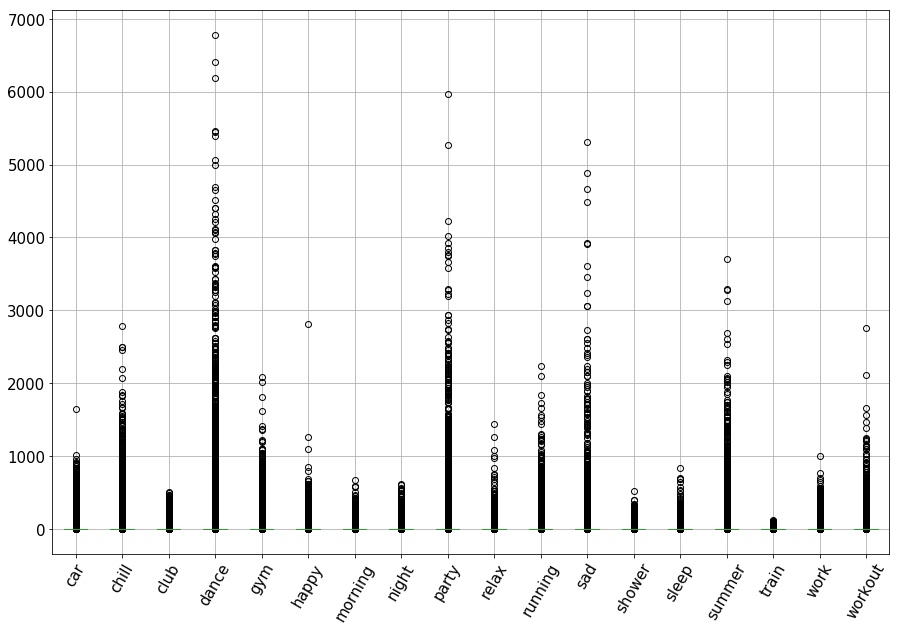

In [14]:
boxplot = songs_top20_df_filtered_track_count_encoded.boxplot(column=['car', 'chill', 'club', 
          'dance', 'gym','happy', 'morning', 'night', 'party', 'relax', 'running', 'sad',
          'shower', 'sleep', 'summer', 'train', 'work', 'workout'], rot=60, fontsize=15, 
          figsize = [15,10])

In [51]:
boxplot.figure.savefig("/home/karim/Documents/Figures/playlists_count.pdf",
        dpi=300, format="pdf")

### Shape of you is suitable for everything! 

In [78]:
most_popular_song = songs_top20_df_filtered_track_count_encoded_grouped[
    songs_top20_df_filtered_track_count_encoded_grouped.playlists_count 
    == songs_top20_df_filtered_track_count_encoded_grouped.playlists_count.max()]
display(most_popular_song)
print("\ncheck the playlist webpage on: \n" + "https://www.deezer.com/en/track/" 
      + str(int(most_popular_song.song_id)))

,song_id,playlists_count,title,car,chill,club,dance,gym,happy,morning,night,party,relax,running,sad,shower,sleep,summer,train,work,workout
148080,139470659,28418,93481270,1640,2490,285,5443,1811,1095,397,595,5963,715,2102,224,524,222,2542,122,1003,1245



check the playlist webpage on: 
https://www.deezer.com/en/track/139470659


## The most labeled song is Get lucky with 6785 times in Dance playlists

In [79]:
most_labeled_songs = songs_top20_df_filtered_track_count_encoded_grouped[songs_top20_df_filtered_track_count_encoded_grouped.dance == songs_top20_df_filtered_track_count_encoded_grouped.dance.max()]
display(most_labeled_songs)
print("\ncheck the playlist webpage on: \n" + "https://www.deezer.com/en/track/" 
      + str(int(most_labeled_songs.song_id)))

,song_id,playlists_count,title,car,chill,club,dance,gym,happy,morning,night,party,relax,running,sad,shower,sleep,summer,train,work,workout
78736,66609426,18448,68183394,349,618,398,6783,745,852,151,620,4016,302,1019,9,124,26,1461,69,439,467



check the playlist webpage on: 
https://www.deezer.com/en/track/66609426


## Some figures and stats on the dataset and classes 

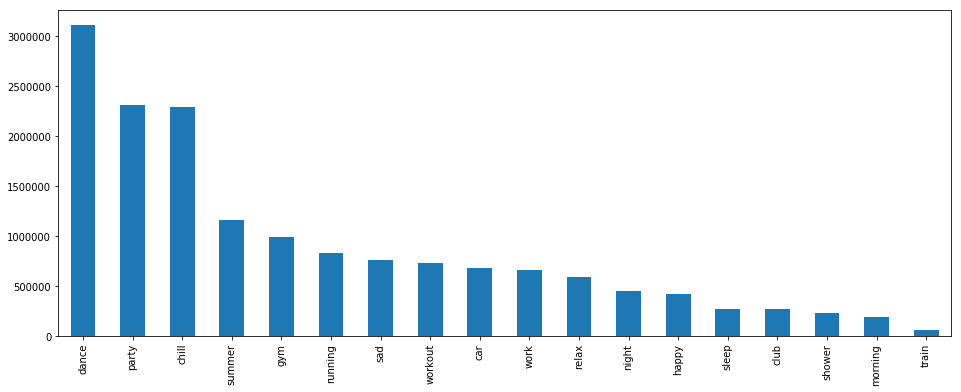

In [101]:
songs_top20_df_filtered_track_count_encoded_grouped.drop(['song_id','title','playlists_count'],
                    axis = 1).sum(axis=0).sort_values(ascending=False)[:50].plot(kind='bar', figsize=(16,6));


In [84]:
# Somthing is wrong with this plot
"""
import seaborn as sns
# calculate co-occurencies
ground_truth_annotations = songs_top20_df_filtered_hot_encoded_grouped.iloc[:, 3:]
coorc = ground_truth_annotations.T.dot(ground_truth_annotations)

# sort co-occurrence matrix
coorc = coorc.loc[coorc.max().sort_values(ascending=False).index]
coorc = coorc[coorc.max().sort_values(ascending=False).index]
songs_top20_df_filtered_hot_encoded_grouped
# scale heat-map color encoding logarithmically
from matplotlib.colors import LogNorm

# shift by one to avoid log-domain error
coorc += 1

vmin = coorc.min().min()
vmax = coorc.max().max()

log_norm   = LogNorm(vmin=vmin, vmax=vmax)
cbar_ticks = [np.power(10, i) for i in np.arange(np.floor(np.log10(vmin)), 1+np.ceil(np.log10(vmax)))]

# plot
fig = plt.figure(figsize=(16,16))
ax = sns.heatmap(coorc, annot=False, cmap="YlGnBu", fmt='g', norm=log_norm, cbar_kws={"ticks": cbar_ticks});
"""

'\nimport seaborn as sns\n# calculate co-occurencies\nground_truth_annotations = songs_top20_df_filtered_hot_encoded_grouped.iloc[:, 3:]\ncoorc = ground_truth_annotations.T.dot(ground_truth_annotations)\n\n# sort co-occurrence matrix\ncoorc = coorc.loc[coorc.max().sort_values(ascending=False).index]\ncoorc = coorc[coorc.max().sort_values(ascending=False).index]\n\n# scale heat-map color encoding logarithmically\nfrom matplotlib.colors import LogNorm\n\n# shift by one to avoid log-domain error\ncoorc += 1\n\nvmin = coorc.min().min()\nvmax = coorc.max().max()\n\nlog_norm   = LogNorm(vmin=vmin, vmax=vmax)\ncbar_ticks = [np.power(10, i) for i in np.arange(np.floor(np.log10(vmin)), 1+np.ceil(np.log10(vmax)))]\n\n# plot\nfig = plt.figure(figsize=(16,16))\nax = sns.heatmap(coorc, annot=False, cmap="YlGnBu", fmt=\'g\', norm=log_norm, cbar_kws={"ticks": cbar_ticks});\n'

## Balancing the dataset 

In [81]:
songs_top20_df_filtered_hot_encoded_grouped.drop(['playlists_count', 'title'],axis = 1, inplace= True)

In [82]:
songs_top20_df_filtered_hot_encoded_grouped.sum(axis =0).sort_values()

train                7846
morning             16582
shower              19829
club                20539
sleep               22004
happy               28583
sad                 32674
workout             37462
night               38409
running             43214
car                 43263
relax               44861
work                47989
gym                 53267
summer              55347
party               84382
dance               94713
chill              100850
song_id    30282397731595
dtype: int64

### dropping classes with less than 20K samples, just to make each class made out of 20k sample

In [83]:
songs_top20_df_filtered_hot_encoded_grouped.drop(['train', 'morning','shower'],axis = 1, inplace= True)

In [84]:
tracks_dataset = songs_top20_df_filtered_hot_encoded_grouped.copy()

In [85]:
e = tracks_dataset.sum(axis =0).sort_values()
sorted_classes = list(e.index)[:-1]

In [86]:
NUMBER_OF_SAMPLES = 20000
balanced_dataset = pd.DataFrame(columns=tracks_dataset.columns)
for context_class in sorted_classes:
    class_number_samples = NUMBER_OF_SAMPLES - len(balanced_dataset[balanced_dataset[context_class] == 1])
    if class_number_samples > 0:
        class_sample = tracks_dataset[tracks_dataset[context_class]== 1].sample(n=class_number_samples,random_state=1)
        balanced_dataset = pd.concat([balanced_dataset, class_sample])
        tracks_dataset = tracks_dataset.drop(tracks_dataset[tracks_dataset[context_class]== 1].index) 

In [87]:
balanced_dataset.sum(axis=0)

song_id   7545204126036.00
car               22711.00
chill             34322.00
club              20000.00
dance             31429.00
gym               23373.00
happy             20000.00
night             23638.00
party             30985.00
relax             21140.00
running           22230.00
sad               20000.00
sleep             20000.00
summer            26200.00
work              23890.00
workout           20000.00
dtype: float64

In [145]:
Saving_PATH = "/home/karim/Documents/GroundTruth/"

balanced_dataset.to_pickle(os.path.join(
    Saving_PATH,"balanced_ground_truth_hot_vector.pkl"))
balanced_dataset.to_csv(os.path.join(
    Saving_PATH,"balanced_ground_truth_hot_vector.csv"))

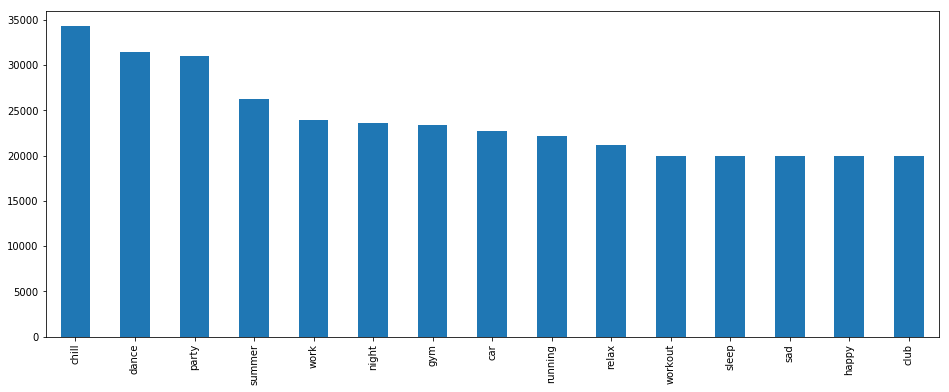

In [146]:
balanced_dataset.drop(['song_id'],
                    axis = 1).sum(axis=0).sort_values(ascending=False)[:50].plot(kind='bar', figsize=(16,6));


In [43]:
classes = balanced_dataset.iloc[:,1:].values
ground_truth_matched = balanced_dataset

In [44]:
# Getting coocuarances
train_classes_df = pd.DataFrame(classes,columns=ground_truth_matched.columns[1:])
coocurrances = pd.DataFrame(columns=train_classes_df.columns)
for column in train_classes_df.columns:
    #coocurrances[column] = train_classes_df[train_classes_df[column] == 1 ].sum()/train_classes_df[column].sum()
    coocurrances[column] = train_classes_df[train_classes_df[column] == 1 ].sum()

coocurrances = coocurrances.T

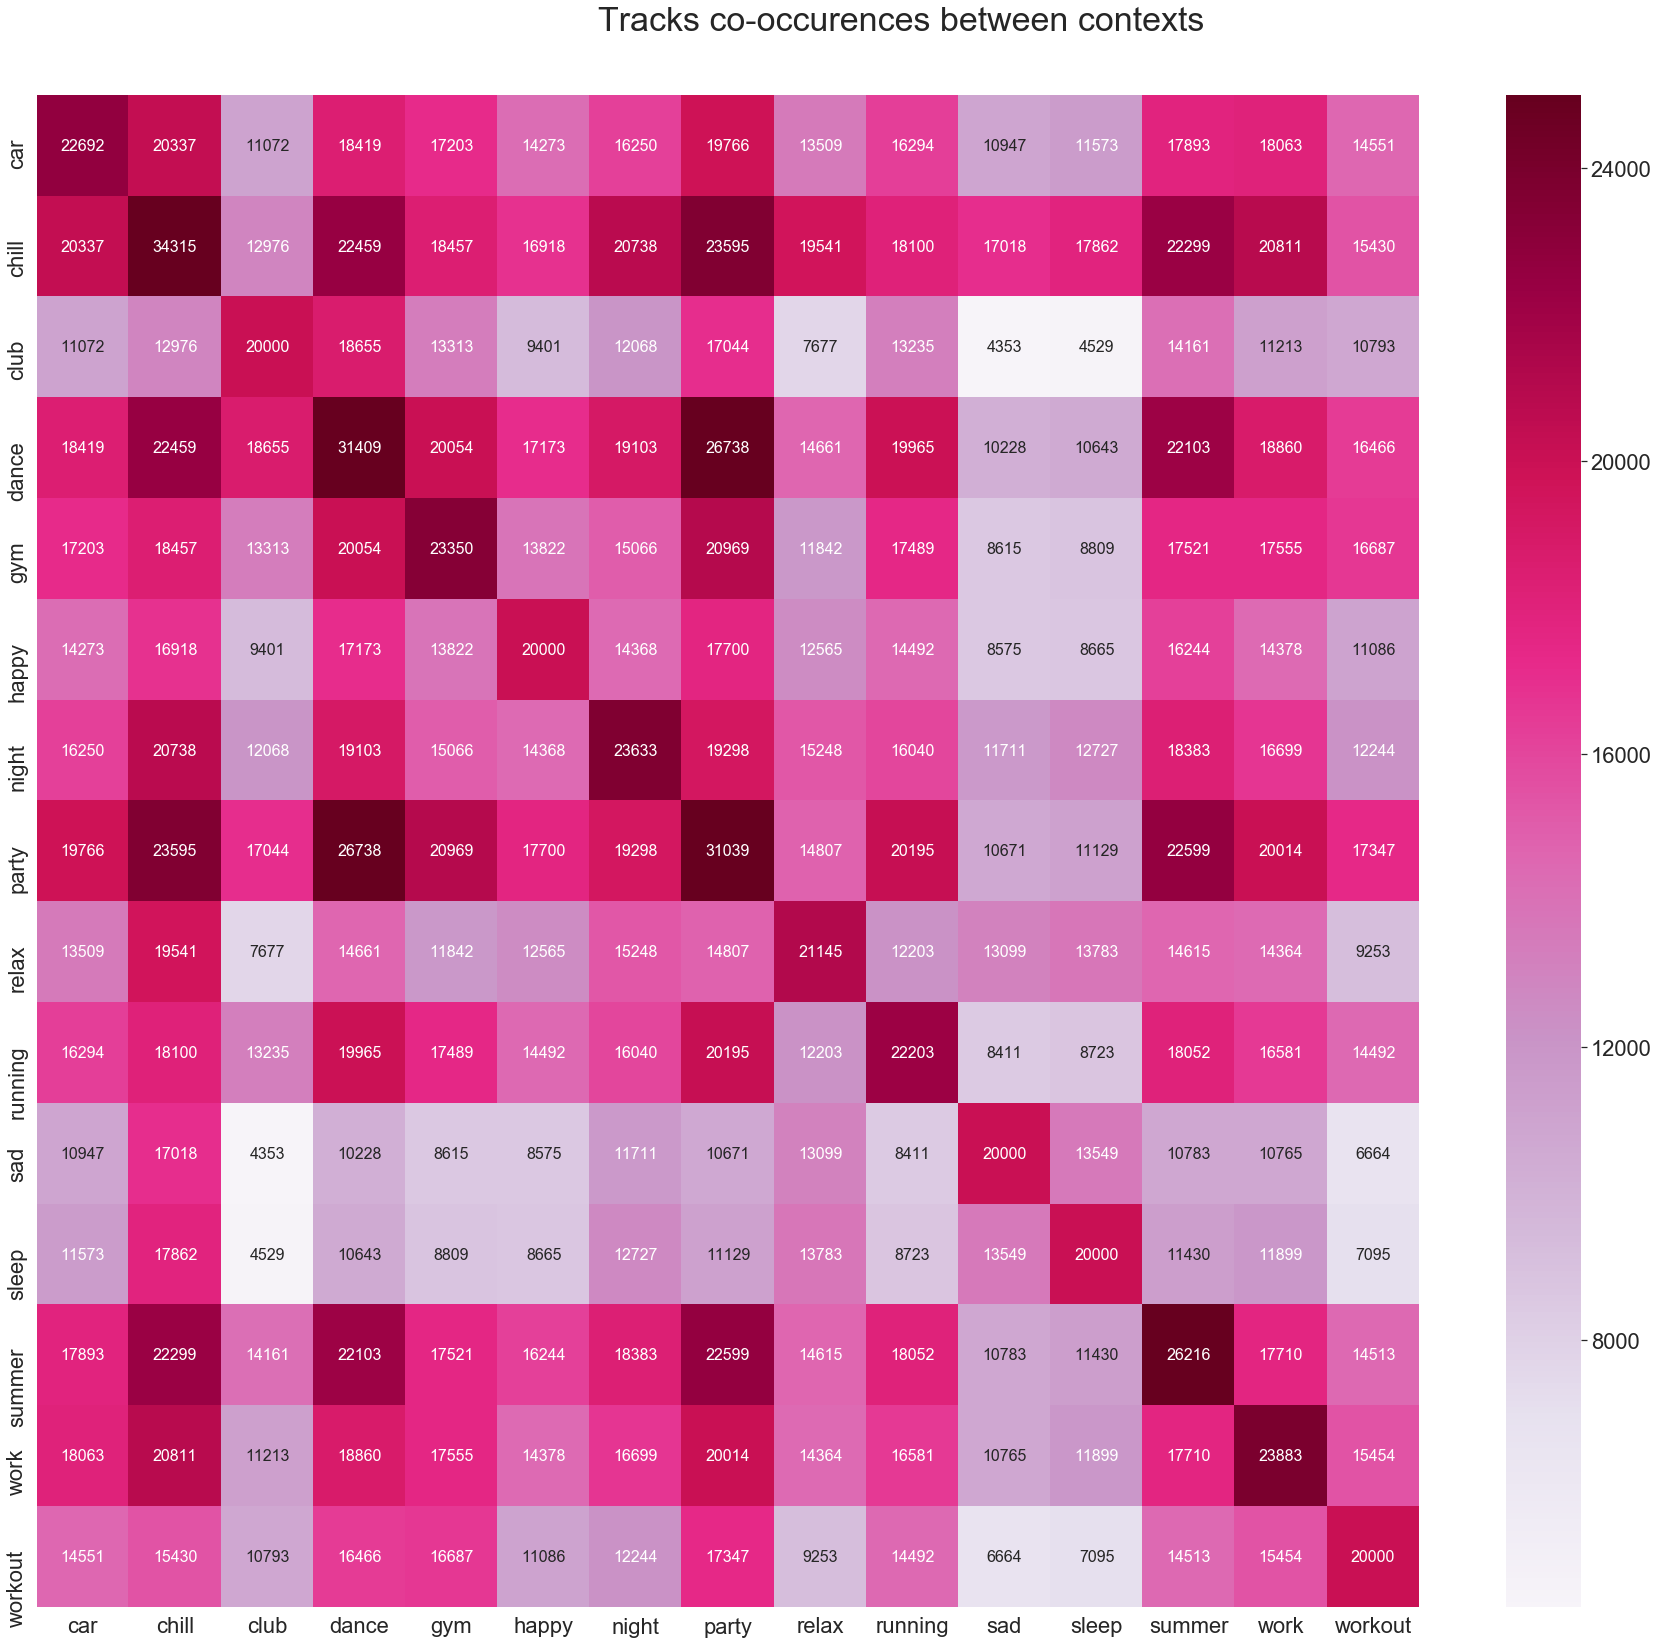

In [48]:
# Plotting coocurances
import seaborn as sn
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Tracks co-occurences between contexts', fontsize=34, ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
hmap = sn.heatmap(coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap, vmax=25000, );
plt.savefig("/home/karim/Documents/Figures/tracks_coocurences_balances.pdf",
        dpi=300, format="pdf")

<Figure size 432x288 with 0 Axes>

## Saving the track count for the selected balanced dataset

In [89]:
songs_top20_df_filtered_track_count_encoded_grouped.drop(['playlist_count', 'title', 'train', 'morning','shower'],axis = 1, inplace= True)

In [112]:
Saving_PATH = "/home/karim/Documents/BalancedDatasetDeezer/GroundTruth/"

balanced_dataset = pd.read_csv(os.path.join(
    Saving_PATH,"balanced_ground_truth_hot_vector.csv"))

In [114]:
balanced_dataset_track_count = songs_top20_df_filtered_track_count_encoded_grouped[
    songs_top20_df_filtered_track_count_encoded_grouped.song_id.isin(balanced_dataset.song_id)]

In [116]:
Saving_PATH = "/home/karim/Documents/BalancedDatasetDeezer/GroundTruth/"

balanced_dataset_track_count.to_pickle(os.path.join(
    Saving_PATH,"balanced_ground_truth_track_count.pkl"))
balanced_dataset_track_count.to_csv(os.path.join(
    Saving_PATH,"balanced_ground_truth_track_count.csv"), index = False)

In [117]:
classes = balanced_dataset_track_count.iloc[:,1:].values
ground_truth_matched = balanced_dataset_track_count

In [118]:
# Getting coocuarances
train_classes_df = pd.DataFrame(classes,columns=ground_truth_matched.columns[1:])
coocurrances = pd.DataFrame(columns=train_classes_df.columns)
for column in train_classes_df.columns:
    #coocurrances[column] = train_classes_df[train_classes_df[column] == 1 ].sum()/train_classes_df[column].sum()
    coocurrances[column] = train_classes_df[train_classes_df[column] >= 1 ].sum()

coocurrances = coocurrances.T

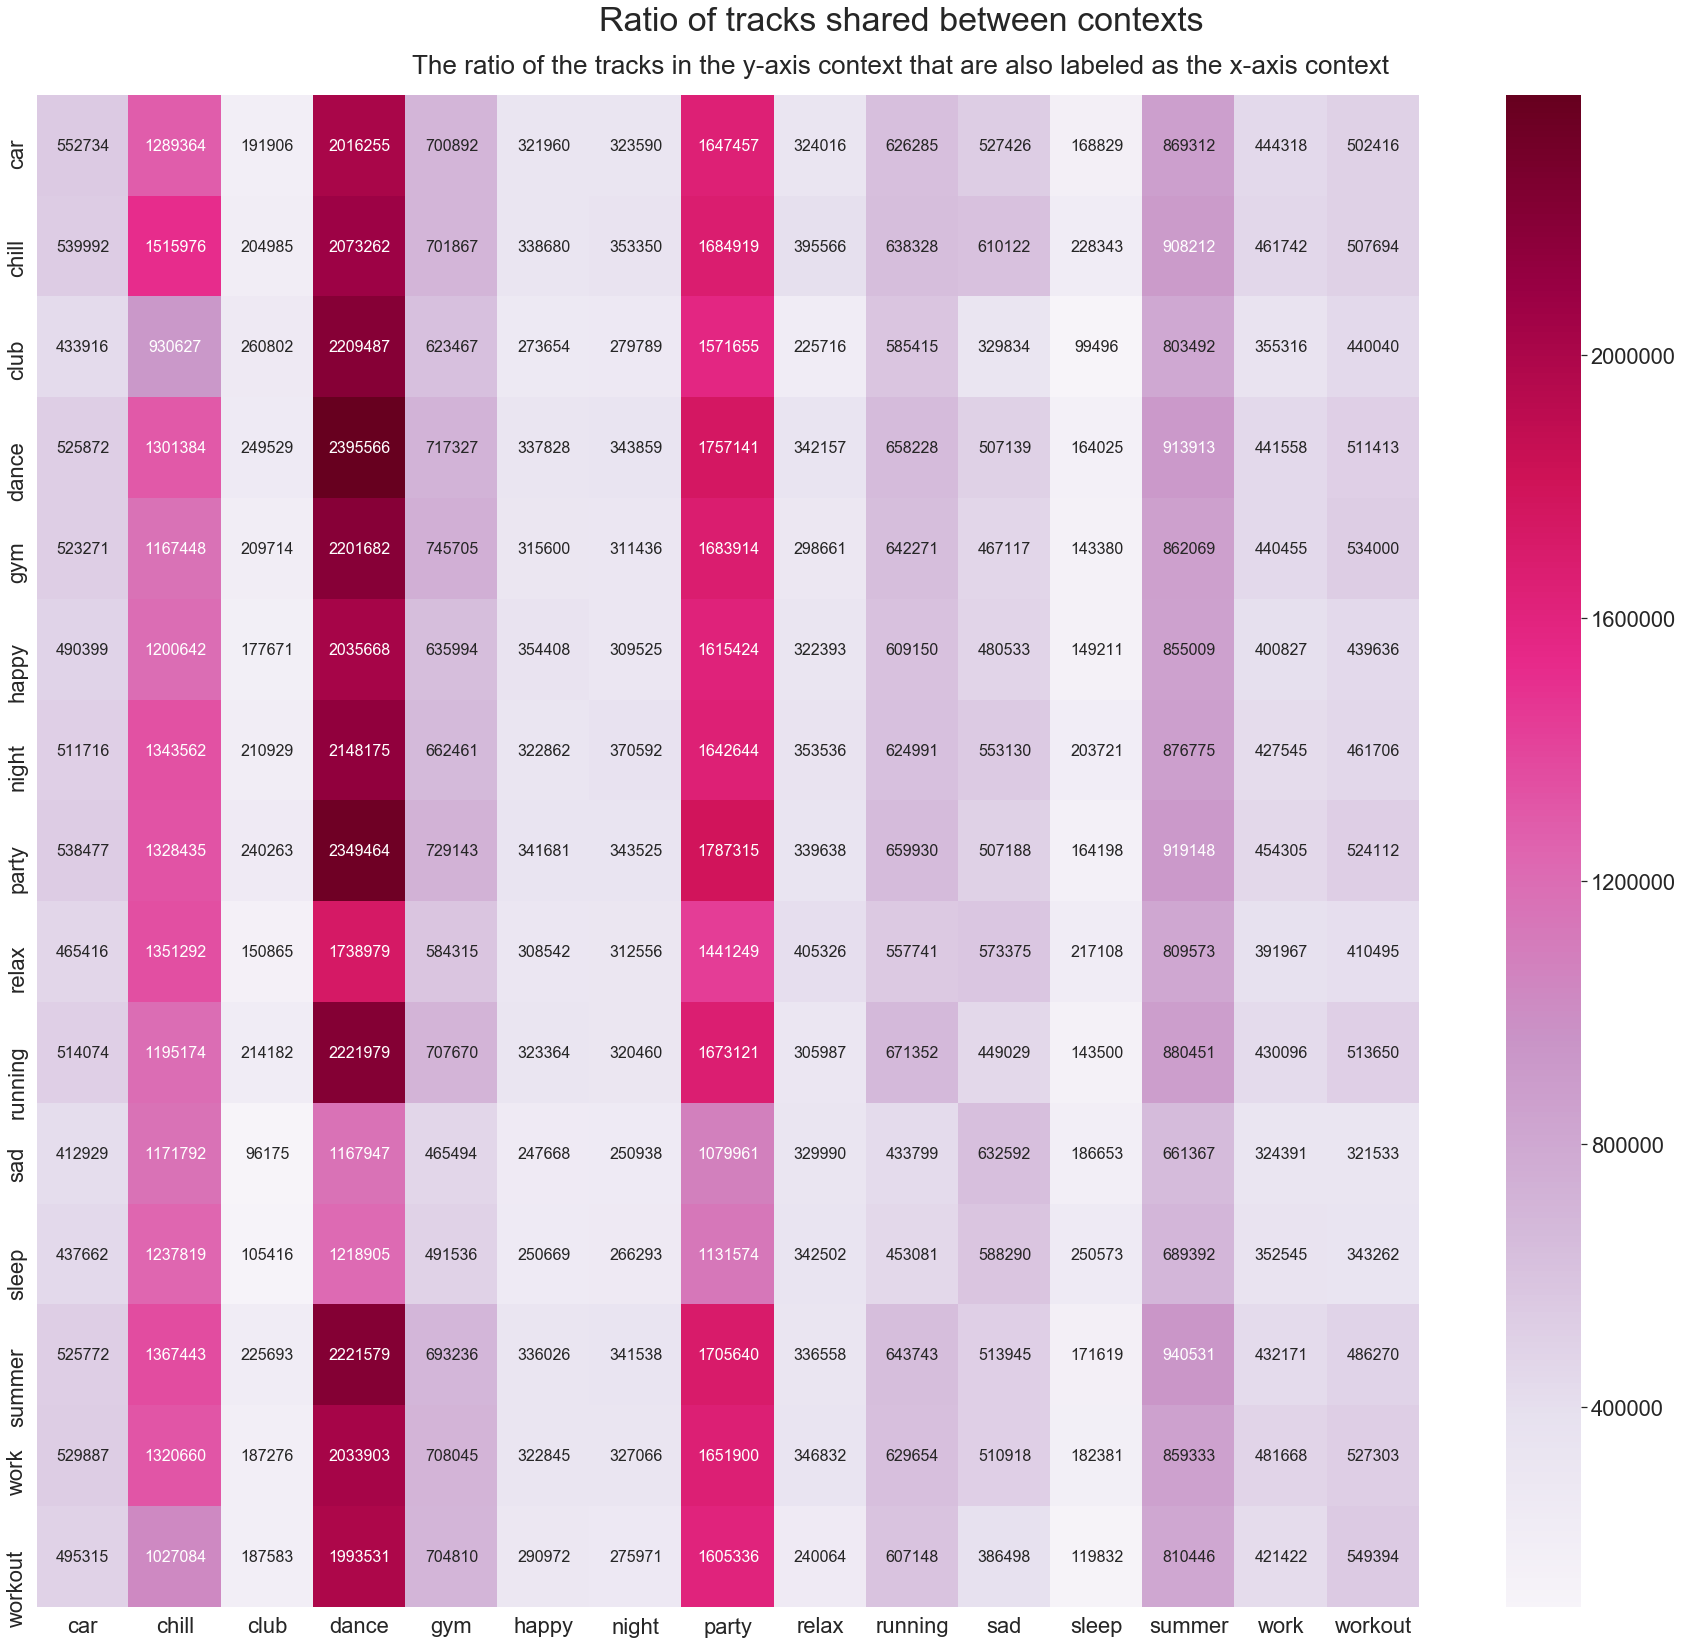

In [119]:
# Plotting coocurances
import seaborn as sn
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Ratio of tracks shared between contexts', fontsize=34, ha='center')
plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 16},fmt='.0f', cmap= cmap, );

# Replotting after dropping (shower, train and morning)

In [17]:
songs_top20_df_filtered_track_count_encoded = songs_top20_df_filtered_track_count_encoded.drop(["shower","morning","train"],axis = 1)

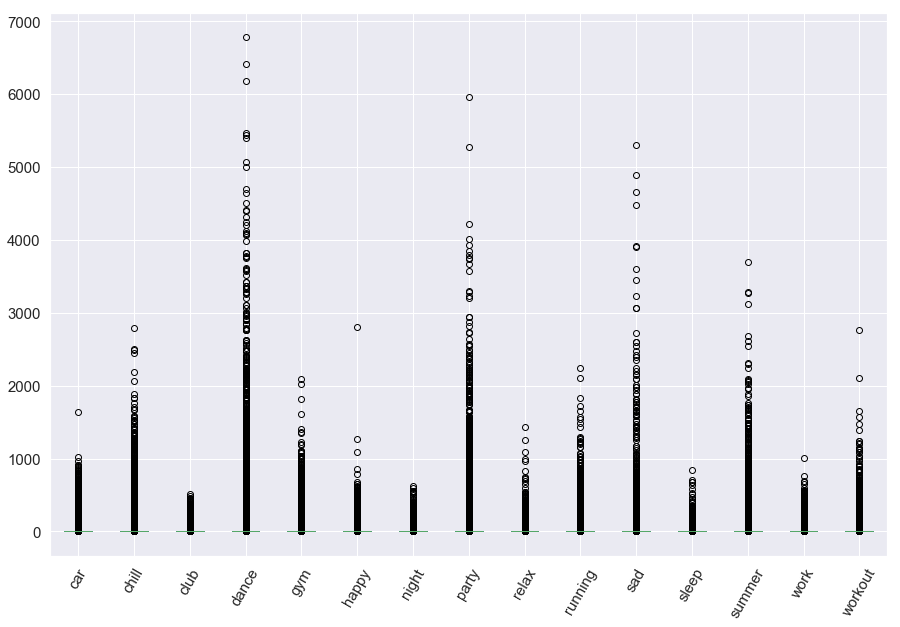

In [39]:
boxplot = songs_top20_df_filtered_track_count_encoded.boxplot(column=['car', 'chill', 'club', 
          'dance', 'gym','happy', 'night', 'party', 'relax', 'running', 'sad',
          'sleep', 'summer', 'work', 'workout'], rot=60, fontsize=15, 
          figsize = [15,10])

In [20]:
boxplot.figure.savefig("/home/karim/Documents/Figures/playlists_count.pdf",
        dpi=300, format="pdf")

In [26]:
songs_top20_df_filtered_hot_encoded_grouped = songs_top20_df_filtered_hot_encoded_grouped.drop(["shower","morning","train"],axis = 1)

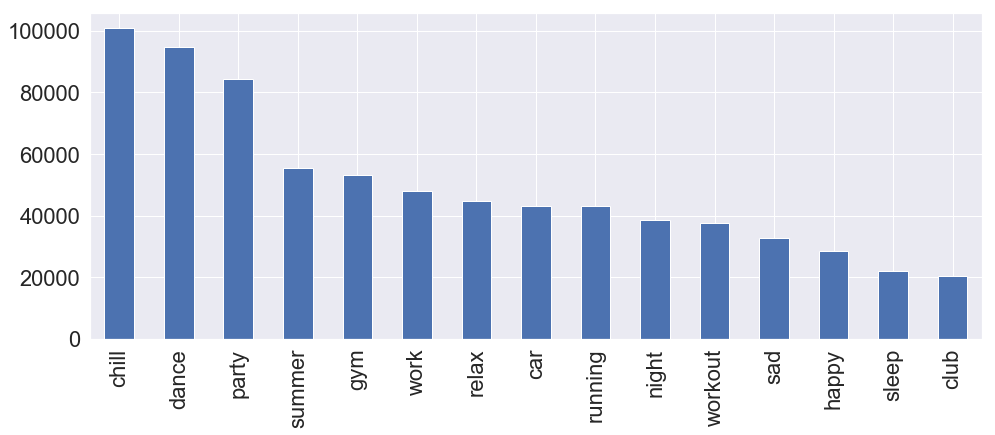

In [37]:
counts_plot = songs_top20_df_filtered_hot_encoded_grouped.drop(['song_id','title','playlists_count'],
                    axis = 1).sum(axis=0).sort_values(ascending=False)[:50].plot(kind='bar', figsize=(16,6));


In [38]:
counts_plot.figure.savefig("/home/karim/Documents/Figures/classes_count.pdf",
        dpi=300, format="pdf")

In [34]:
Saving_PATH = "/home/karim/Documents/BalancedDatasetDeezer/GroundTruth/"
balanced_dataset = pd.read_csv(os.path.join(Saving_PATH,"balanced_ground_truth_hot_vector.csv"))

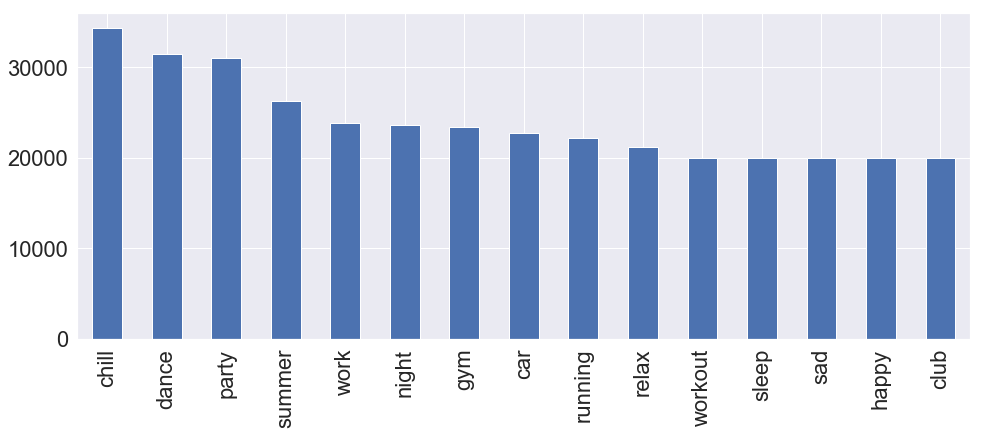

In [41]:
counts_plot = balanced_dataset.drop(['song_id'],
                    axis = 1).sum(axis=0).sort_values(ascending=False)[:50].plot(kind='bar', figsize=(16,6));

In [42]:
counts_plot.figure.savefig("/home/karim/Documents/Figures/classes_count_balanced.pdf",
        dpi=300, format="pdf")

In [54]:
balanced_dataset.drop("song_id",axis=1).mean().mean()

0.48052901787204494